# Titanic Data Analysis

## First Step - look over the data

I am going to look over the given data so that I could brainstorm some interesting questions. My guess on Titanic data is 'survivability'. 
  
- **given data file**: titanic-data.csv
- **libraries**: pandas, numpy, matplotlib

In [57]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

titanic_df = pd.read_csv('titanic-data.csv')

pandas Dataframe has good functions to briefly inspect such as 'head()' or 'describe()'.

In [58]:
titanic_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


Here, I just displayed one row (record) or the data to find out what columns are available. I think It is very nice approach to inspect only kinds of columns without actual data for brainstorming. I could be overwhelmed if I have to look through all the records at the first time.

Field Explanation (from Kaggle)
- **survival** : Survival (0 = No, 1 = Yes)
- **pclass** : Ticket class (1 = 1st/Upper, 2 = 2nd/Middle, 3 = 3rd/Lower)
- **sex** : Sex
- **Age** : Age in years
- **sibsp** : # of siblings / spouses aboard the Titanic (siblings = brother/sister/stepbrother/stepsister, spouse = husband/wife)
- **parch** : # of parents / children aboard the Titanic (parent = mother/father, child = daughter/son/stepdaughter/stepson)
  - some children travelled only with a nanny, therefore parch=0 for them
- **ticket** : Ticket number
- **fare** : Passenger fare
- **cabin** : Cabin number
- **embarked** : Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [59]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [60]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### Keep in mind that there are some missing values for the columns, 'Age', 'Cabin', and 'Embarked'.

# Main Question. Relationship between Pclass and Survived

### - before going into detail, let's find out how many people survived from the titanic

In [61]:
print titanic_df['Survived'].mean()

0.383838383838


Only about 38% of all passengers have survived from the disaster. I think this contrast number between survived group and died group could explain surviving factor better.

### -what ages of people were on board?

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


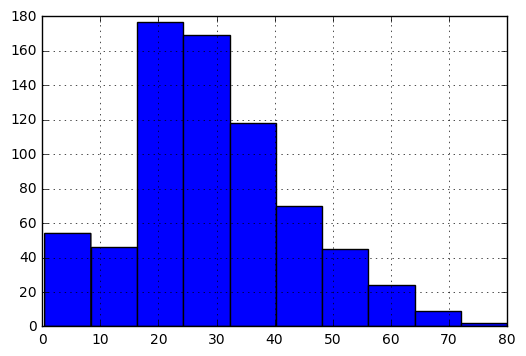

In [62]:
print titanic_df['Age'].describe()
titanic_df['Age'].hist()

Most passengers were age in between 20 to 40, but there are diverse age groups of people. I think this is great because I am very curious if younger and older passengers had more opportunity to survive over other age groups.

### - upper class people tended to be survived with more chance?

I know the Titanic only from the movie, so I might understand the situation as described in the movie. Because movie depicted that women, children, and elders were the top priority to be rescued regardless of their classes. I was wondering if that's true; if the movie distorted the real truth. I decided to inspect the given data to find it out! 

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


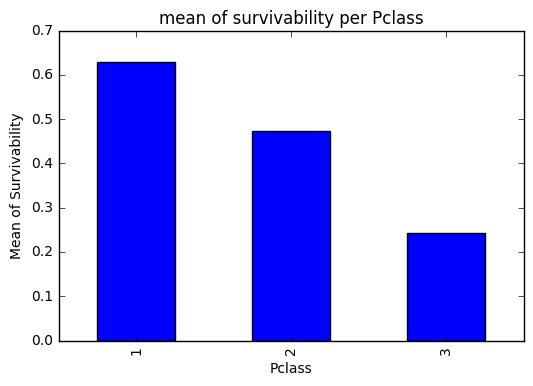

In [63]:
mean_survive_by_class = titanic_df.groupby('Pclass')['Survived'].mean()
mean_survive_by_class_plot = mean_survive_by_class.plot(kind='bar', title='mean of survivability per Pclass', x='a')
mean_survive_by_class_plot.set(xlabel='Pclass', ylabel='Mean of Survivability')

print mean_survive_by_class

By inspecting survivability for each class, it looks evident that upper class could have survived more than lower class. More than double number of chance, class1 had more chance to survive than class3. 

I became more curious about the result. Why? there could be more women and children in upper class on board by accidently. In order to confirm that upper class shows higher surviving chance because of their social standing not because of any other factors.

## handling missing values

First, I am going to remove the 'Cabin' and 'Embarked' column from the dataframe since I am only interested in the 'Age' column. Second, I am going to remove all the rows whose value of the 'Age' column is NaN.

In [64]:
new_titanic_df = titanic_df.drop('Cabin', axis=1)
new_titanic_df = new_titanic_df.drop('Embarked', axis=1)

new_titanic_df = new_titanic_df.dropna(axis=0, how='any')
new_titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
dtypes: float64(2), int64(5), object(3)
memory usage: 61.4+ KB


### - elder, youger people had more chance to survive?

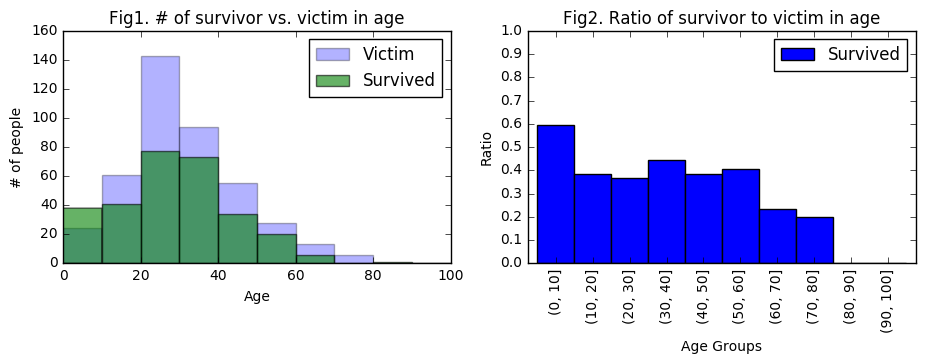

In [65]:
total_bin = 10

groups = new_titanic_df.groupby("Survived")["Age"]
fig, ax = plt.subplots(1, 2, figsize=(11, 3))
for key, value in groups:
    if key==0:
        value.plot.hist(label='Victim', alpha=.3, ax=ax[0], bins=total_bin, range=(0, 100))
    else:
        value.plot.hist(label='Survived', alpha=.6, ax=ax[0], bins=total_bin, range=(0, 100))

ax[0].set_title('Fig1. # of survivor vs. victim in age')
ax[0].set_ylabel('# of people')
ax[0].set_xlabel('Age')
ax[0].legend()

new_titanic_df["Age_grouped"] = pd.cut(new_titanic_df["Age"], range(0, 105, 10))
new_titanic_df.groupby("Age_grouped")["Survived"].mean().plot.bar(ax=ax[1], width=1.0)

ax[1].set_title('Fig2. Ratio of survivor to victim in age')
ax[1].set_yticks(np.arange(0, 1.1, 0.1))
ax[1].set_ylabel('Ratio')
ax[1].set_xlabel('Age Groups')
ax[1].legend()

plt.show()

Fig1 simply displays the number of survivor and victim in range of age. Fig2 shows the ratio of the number of survivor to victim in each age group of 10. The higher ratio means more chance to survive.

Even though people in age between 0 to 10 has higher ratio than other groups, it doesn't look much becuase almost half of children on board died. If they had much higher priority, I think more than 80% of them should have been rescued.

Other than young age group, there is not much difference for age in between 10 to 60. By looking at the ratio for elders, I assume that elders were left behind more often.

That was about overall analysis for the survivors and victims in different age group. I am just going to experiment whether this is trend for each class too, so that I can be confident about the result.

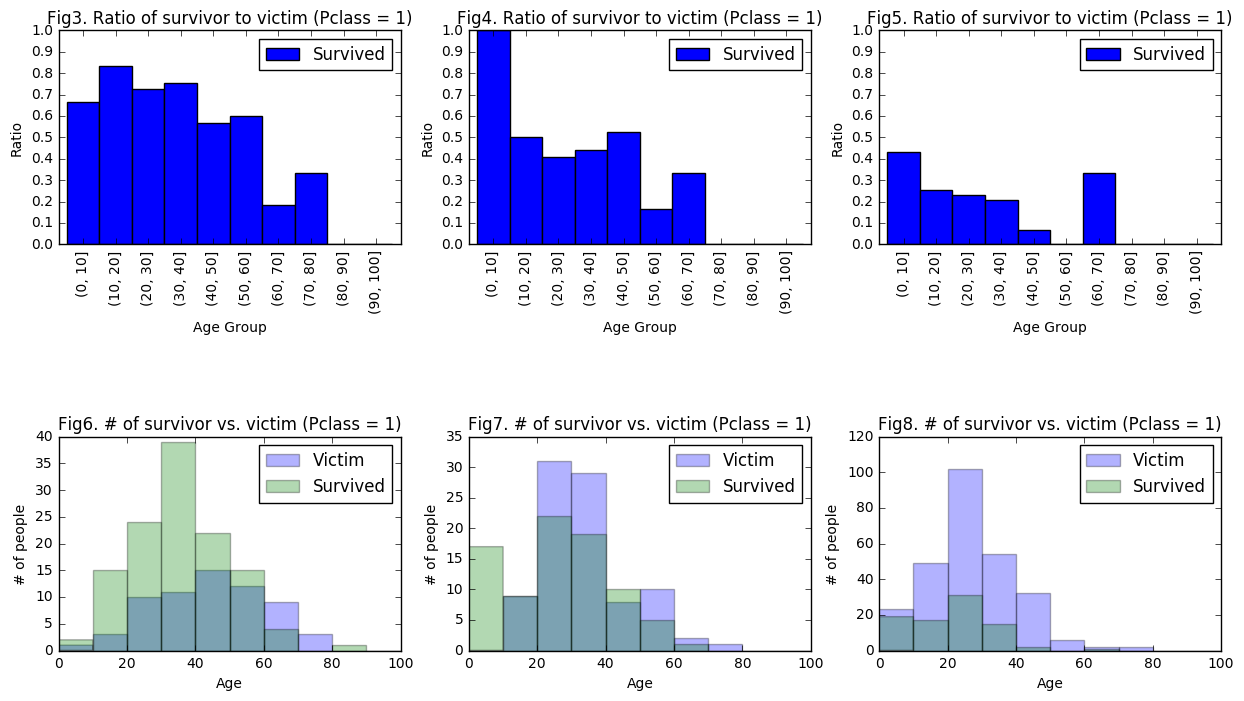

In [66]:
def get_survive_grouped_in_age_by_class(class_kind):
    return new_titanic_df[new_titanic_df["Pclass"] == class_kind].groupby("Age_grouped")["Survived"]

def set_ratio_plot_for(class_kind, ax, fig_num):
    ax.set_title('Fig{}. Ratio of survivor to victim (Pclass = {})'.format(fig_num, class_kind))
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    ax.set_xlabel('Age Group')
    ax.set_ylabel('Ratio')
    ax.legend()

def draw_surv_victim_hist_for(value, label, ax):
    value.plot.hist(label=label, alpha=.3, ax=ax, bins=total_bin, range=(0, 100))
    
def set_surv_victim_hist_for(class_kind, ax, fig_num):
    ax.set_title('Fig{}. # of survivor vs. victim (Pclass = {})'.format(fig_num, class_kind))
    ax.set_xlabel('Age')
    ax.set_ylabel('# of people')
    ax.legend()
    
groups = new_titanic_df.groupby(["Survived", "Pclass"])["Age"]
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

new_titanic_df["Age_grouped"] = pd.cut(new_titanic_df["Age"], range(0, 105, 10)).dropna()

class1 = get_survive_grouped_in_age_by_class(1).mean()
class2 = get_survive_grouped_in_age_by_class(2).mean()
class3 = get_survive_grouped_in_age_by_class(3).mean()

class1.plot.bar(ax=ax[0][0], width=1.0)
class2.plot.bar(ax=ax[0][1], width=1.0)
class3.plot.bar(ax=ax[0][2], width=1.0)

set_ratio_plot_for(1, ax[0][0], 3)
set_ratio_plot_for(1, ax[0][1], 4)
set_ratio_plot_for(1, ax[0][2], 5)

for key, value in groups:
    value = value.dropna()
    
    if key==(0, 1):
        draw_surv_victim_hist_for(value, 'Victim', ax[1][0])
    elif key==(0, 2):
        draw_surv_victim_hist_for(value, 'Victim', ax[1][1])
    elif key==(0, 3):
        draw_surv_victim_hist_for(value, 'Victim', ax[1][2])
    elif key==(1, 1):
        draw_surv_victim_hist_for(value, 'Survived', ax[1][0])
    elif key==(1, 2):
        draw_surv_victim_hist_for(value, 'Survived', ax[1][1])
    elif key==(1, 3):
        draw_surv_victim_hist_for(value, 'Survived', ax[1][2])
        
        
set_surv_victim_hist_for(1, ax[1][0], 6)
set_surv_victim_hist_for(1, ax[1][1], 7)
set_surv_victim_hist_for(1, ax[1][2], 8)

fig.subplots_adjust(hspace=0.9)

I probably have to change my opinion on the previous analysis. In Fig6, Fig7, and Fig8, very small number of children in class1 are found while relatively much larger children are found in class2 and class3. Every single child belonging to class2 has even survived. 

What I think what this explains is children in class1 can't be taken into account, but children in class2 and class3 can be. Even though survivors in class2 and class3 takes relatively smaller portion of the entire population, young children were rescued regardless of their classes. 

I think children were rescued with higher priority.

### - female had more chance to survive over man?

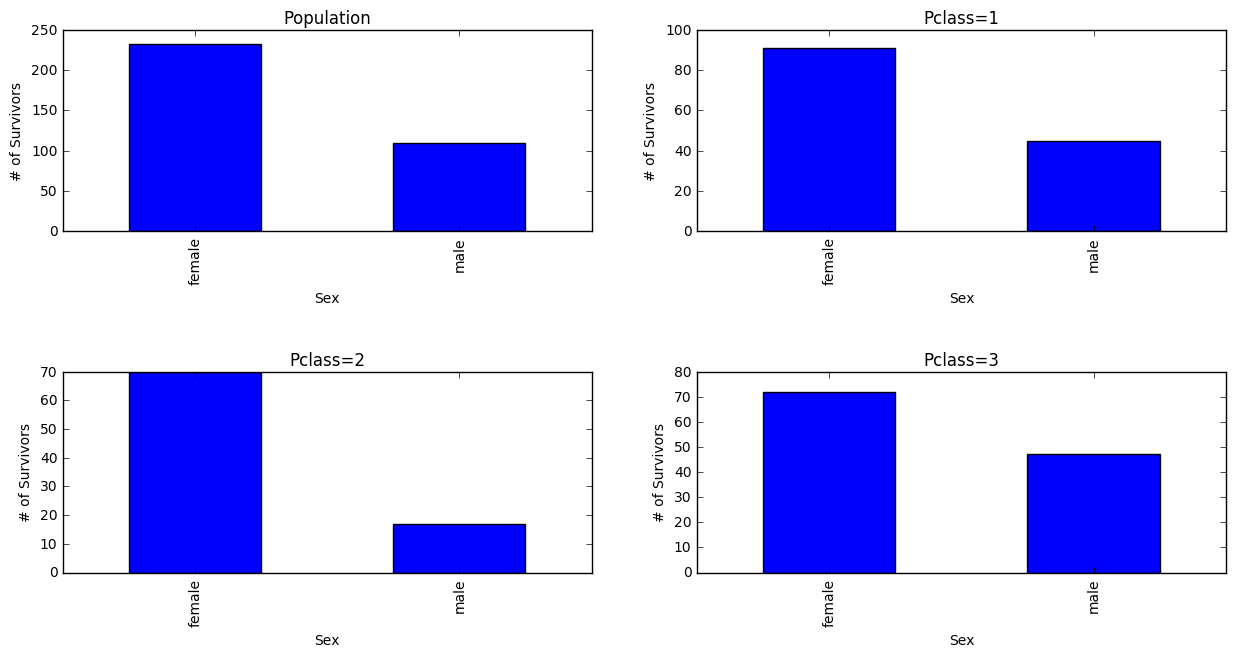

In [67]:
def get_survived_sex_group_by_class(class_kind):
    return titanic_df[titanic_df['Pclass'] == class_kind].groupby("Sex")["Survived"]

def set_survived_sex_group_plot_for(class_kind, ax):
    ax.set_title('Pclass={}'.format(class_kind))
    ax.set_ylabel('# of Survivors')
    ax.legend()
    
fig, ax = plt.subplots(2, 2, figsize=(15, 7))

groups = titanic_df.groupby("Sex")["Survived"]
groups.sum().plot(kind='bar', ax=ax[0][0])
ax[0][0].set_title('Population')
ax[0][0].set_ylabel('# of Survivors')

class1 = get_survived_sex_group_by_class(1).sum()
class2 = get_survived_sex_group_by_class(2).sum()
class3 = get_survived_sex_group_by_class(3).sum()

set_survived_sex_group_plot_for(1, ax[0][1])
set_survived_sex_group_plot_for(2, ax[1][0])
set_survived_sex_group_plot_for(3, ax[1][1])

class1.plot(kind='bar', ax=ax[0][1])
class2.plot(kind='bar', ax=ax[1][0])
class3.plot(kind='bar', ax=ax[1][1])

fig.subplots_adjust(hspace=0.7)

It looks obvious that female had more chance to survive from the disaster than male overall regardless of Pclass.

## Conclusion

I have looked through corelations between Pclass and survibability, Pclass and age group, and Pclass and Sex. I was  skeptical about the historical fact that young and female groups had more chance to survive over higher class people. 

By looking at the actual data given, I could conclude that the historical fact is correct. Young children did survive with much higher probability comparing to those in age over 10. The people with higher class also survived with much more chance when age groups comes over 10 though. I guess they used their power somewhat and somehow. 

Female did survived overwhelmingly much more than male. It looks obvious.

### Appendix - sibsp, parch

I didn't find that how many siblings/spouse, parents/children had impact on survibability much. 

Just somewhat, poeple with smaller number of companions looks survived with higher chance.

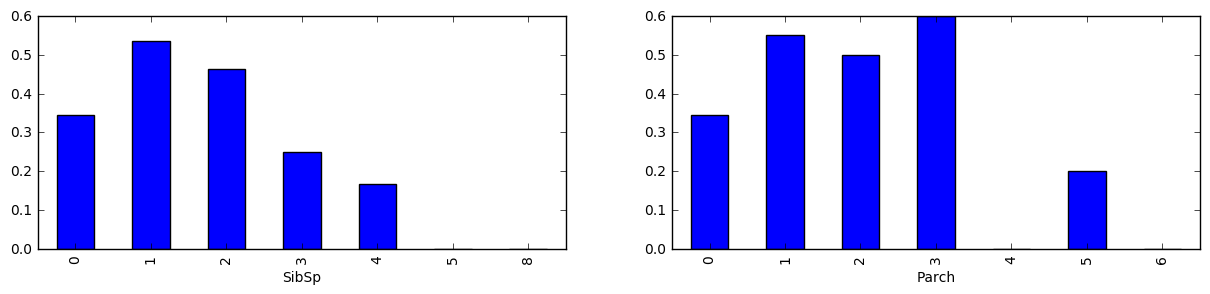

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(15, 3))

titanic_df.groupby('SibSp').mean()['Survived'].plot(kind='bar', ax=ax[0])
titanic_df.groupby('Parch').mean()['Survived'].plot(kind='bar', ax=ax[1])

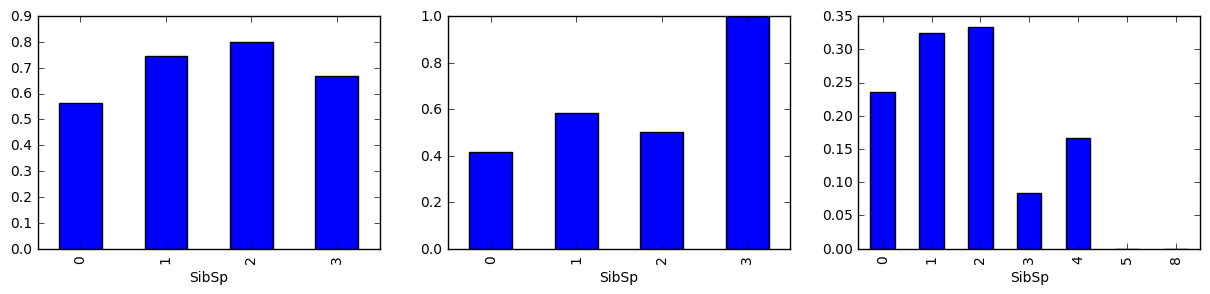

In [69]:
fig, ax = plt.subplots(1, 3, figsize=(15, 3))

titanic_df.query('Pclass == 1').groupby('SibSp')['Survived'].mean().plot(kind='bar', ax=ax[0])
titanic_df.query('Pclass == 2').groupby('SibSp')['Survived'].mean().plot(kind='bar', ax=ax[1])
titanic_df.query('Pclass == 3').groupby('SibSp')['Survived'].mean().plot(kind='bar', ax=ax[2])

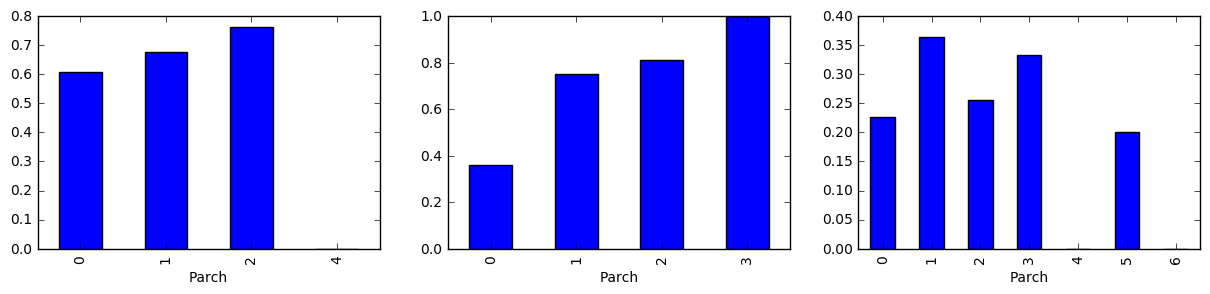

In [70]:
fig, ax = plt.subplots(1, 3, figsize=(15, 3))

titanic_df.query('Pclass == 1').groupby('Parch')['Survived'].mean().plot(kind='bar', ax=ax[0])
titanic_df.query('Pclass == 2').groupby('Parch')['Survived'].mean().plot(kind='bar', ax=ax[1])
titanic_df.query('Pclass == 3').groupby('Parch')['Survived'].mean().plot(kind='bar', ax=ax[2])